# **Insurance Pricing Forecast Using XGBoost Regressor**


## **Project Overview**

Insurance companies cover expenses the policyholder incurs from damages to health or property policies commonly offered: medical bills, house, motor vehicle, and fire insurance, and financial losses such as a loss of income against a fee or premium paid by the client. Traditional approaches to premium calculation require a lot of time-consuming human labor and are getting more complicated daily to capture the increasingly complex interactions in the data.
Insurance firms should normally collect a higher premium than the amount given to the insured individual if that person files a valid claim to generate a profit. Since profitability is the fundamental factor that helps the insurance firm survive, they need a mechanism for reliably forecasting healthcare expenses.

Hence, our goal is to build a machine learning model that helps establish the rates by predicting the charges or payouts done by the health insurance firm to maintain profitability.

In this project, we will primarily focus on building an XGBoost Regressor to determine healthcare expenses based on features such as age, BMI, smoking, etc. We will also learn about categorical correlation, build a linear regression model as a baseline and compare it with the results of the XGBoost regressor. We will eventually learn how to communicate technical results to stakeholders who are not technical.


![image](https://images.unsplash.com/photo-1637763723578-79a4ca9225f7?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1171&q=80)

#### **Problem statement**

To make a profit, insurance companies should generally collect a higher premium than the amount paid to the insured person if they raise a valid claim. This being the case, insurance companies require a method of accurately predicting health care costs.

**Therefore our goal is to accurately predict health care costs using the given set of features.**

## **Learning Outcomes**


* Understanding the insurance pricing problem statement
* Exploratory Data Analysis on Categorical and Continuous Data
* Univariate Data Analysis
* Bivariate Data Analysis
* Understand Correlation Analysis
* Categorical Correlation with Chi-squared 
* Correlation between Categorical and Target Variables with ANOVA
* Label Encoding for Categorical Variables
* Understanding Linear Regression Assumptions
* Implementing Linear Regression
* Validating Linear Regression Assumptions
* Understanding XGBoost Regressor
* Implementing XGBoost Regressor
* Building pipelines with Sklearn’s Pipeline operator
* Implementing BayesSearchCV for XGBoost Hyperparameter Optimization
* Evaluating Models with Regression Metrics - RMSE
* Presenting Non-Technical Metrics for Stakeholders


## **Approach**

1. Exploratory Data Analysis (EDA)
4. Build and evaluate a baseline linear model
    1. Linear regression assumptions
    2. Data preprocessing
    3. Model training
    4. Model evaluation
5. Improve on the baseline linear model
    1. Introduction to a non-linear model - XGBoost
    2. Data preprocessing
    3. Using Sklearn's `Pipeline` to optimise the model training process
    4. Model evaluation 
    5. Comparison to the baseline model
6. Presenting the results to non-technical stakeholders

## **Important Libraries**
 
* **Pandas**: pandas is a fast, powerful, flexible, and easy-to-use open-source data analysis and manipulation tool built on top of the Python programming language. Refer to [documentation](https://pandas.pydata.org/) for more information.
 
* **NumPy**: The fundamental package for scientific computing with Python. Fast and versatile, the NumPy vectorization, indexing, and broadcasting concepts are the de-facto standards of array computing today. NumPy offers comprehensive mathematical functions, random number generators, linear algebra routines, Fourier transforms, and more. Refer to [documentation](https://numpy.org/) for more information. pandas and NumPy are together used for most of the data analysis and manipulation in Python.
 
* **Matplotlib**: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Refer to [documentation](https://matplotlib.org/) for more information.
 
 
* **scikit-learn**: Simple and efficient tools for predictive data analysis
accessible to everybody and reusable in various contexts.
It is built on NumPy, SciPy, and matplotlib to support machine learning in Python. Refer to [documentation](https://scikit-learn.org/stable/) for more information.

* **statsmodels**: statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests and statistical data exploration. Refer to [documentation](https://www.statsmodels.org/stable/index.html) for more information.

* **plotly**: Plotly's Python graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts. Refer to [documentation](https://plotly.com/python/) for more information.

* **scikit-optimize**: Scikit optimize enables sequential model based optimization in Python. Refer to [documentation](https://scikit-optimize.github.io/stable/) for more information.

* **category_encoders**: A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques. Refer to [documentation](https://contrib.scikit-learn.org/category_encoders/) for more information.

* **xgboost**: XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. Refer to [documentation](https://xgboost.readthedocs.io/en/stable/) for more information.

 



## **Install Packages**


In [1]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

!pip install numpy==1.21.0 --quiet
!pip install pandas==1.5.2 --quiet
!pip install plotly==5.11.0 --quiet
!pip install scikit-learn==1.2.0 --quiet
!pip install scikit-optimize==0.9.0 --quiet
!pip install statsmodels==0.13.5 --quiet
!pip install category_encoders==2.5.1 --quiet
!pip install xgboost==1.7.2 --quiet
!pip install projectpro --upgrade --quiet
!pip install nbformat==5.7.1 --quiet
!pip install matplotlib==3.6.2 --quiet

!pip install pandas==1.5.3 --quiet

pip install category_encoders

In [8]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 397.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### **Import Libraries**

Before we start, let's first import the necessary third party libraries:

In [2]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import sys
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import math
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.feature_selection import RFE



And the functions in the `ml_pipeline` folder:

In [3]:
# ml_pipeline folder should be in the same directory as the notebook, append the path and import functions
sys.path.append('ml_pipeline/')
from eda import plot_histograms, plot_univariate_numeric, plot_univariate_categorical, \
plot_heatmap, plot_paired_boxplots, plot_paired_scatterplots, plot_residuals, plot_pearson_wrt_target
from stats import chi2, anova
from model_performance import calc_model_performance, compare_model_performance, calc_preds_in_residual_range,\
calc_preds_in_residual_perc_range

## **Exploratory Data Analysis (EDA)**


Exploratory Data Analysis, commonly known as EDA, is a technique to analyze the data with visuals. It involves using statistics and visual techniques to identify particular trends in data. 
 
It is used to understand data patterns, spot anomalies, check assumptions, etc. The main purpose of EDA is to help look into the data before making any hypothesis about it.

EDA is an important step in the process of building a machine learning model. It enables us to understand how the variables are distributed, related and which features will have good predictive power.

First, let's read in the dataset, which is stored in the `insurance.csv` file in the `input` folder:

In [4]:
data = pd.read_csv('data/insurance.csv')

Now we can eyeball the dataset:

In [5]:
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### **Data Dictionary**

The column defintions are below:

* `age`: Age of primary beneficiary.
* `sex`: Gender of primary benficiary.
* `bmi`: Body mass index of primary benficiary: $\frac{weight_{kg}}{(height_{metres})^2}$
* `children`: Number of children that the primary beneficiary has.
* `smoker`: Whether the primary beneficiary smokes.
* `region`: The primary beneficiary's residential area in the US.
* `charges`: Individual medical costs billed by health insurance.

Let's return the datatypes of the columns:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
col_type = data.dtypes

In [8]:
col_type[data.dtypes=='int64'].index.values

array(['age', 'children'], dtype=object)

In [9]:
data.select_dtypes(include='int64').columns

Index(['age', 'children'], dtype='object')

In [10]:
data.select_dtypes(include=np.number).columns 

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

So we have three numeric features (`age`, `bmi` and `children`) and three categorical features (`sex`, `smoker` and `region`).

**NOTE:** there are no null values in any of the columns, which means we won't need to impute values in the **Data preprocessing** step. This, however, is usually a step that you'll need to consider when building a machine learning model.

The target (i.e. the variable that we want to predict) is the `charges` column, so let's split the dataset into features (`X`) and the target (`y`):

In [11]:
target = 'charges'
X = data.drop(target, axis=1)
y = data[target]

Check dataframe shapes:

In [12]:
X.shape, y.shape

((1338, 6), (1338,))

### **Distributions**

Let's now look at the distribution of each feature by plotting a histogram for each:

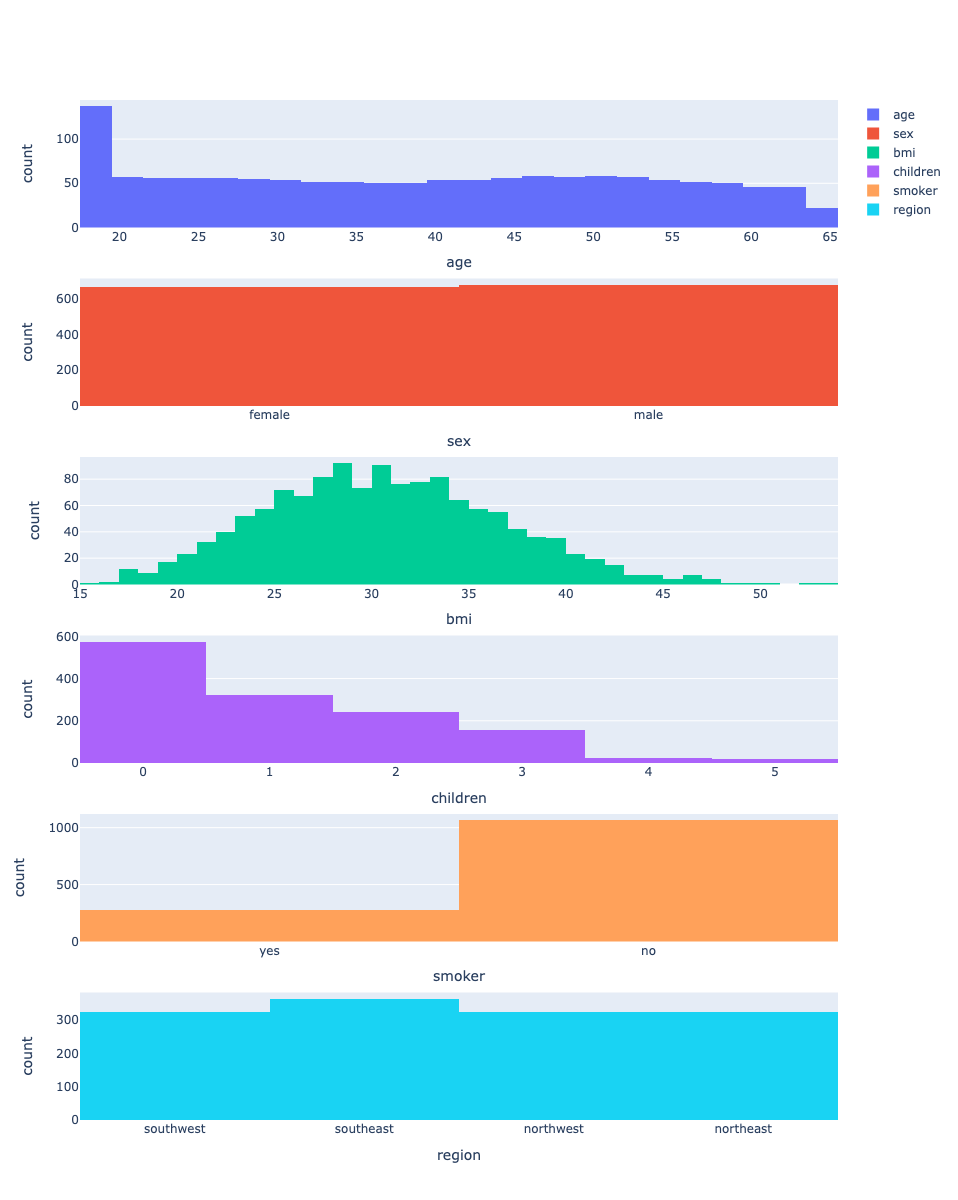

In [13]:
# Plots histogram for each feature using plotly library
plot_histograms(X)

Points to note regarding the distribution of each feature:

* `age` - Approximately uniformly distributed.
* `sex` - Approximately equal volume in each category.
* `bmi` - Approximately normally distributed.
* `children` - Right skewed (i.e. higher volume in lower range).
* `smoker` - Significantly more volume in the `no` category vs the `yes` category.
* `region` - Approximately equal volume in each category.

We can also observe the distribution of the target:

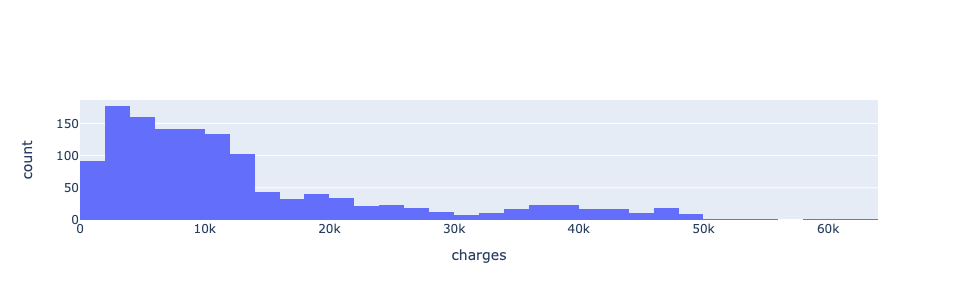

In [14]:
# Plots histogram for target using plotly library
plot_histograms(pd.DataFrame(y), height=300)

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histograms_simple(X, height=600):
    sns.set(style="whitegrid")
    sns.set_context("talk")

    num_cols = X.shape[1]
    fig, axes = plt.subplots(num_cols, 1, figsize=(10, 4*num_cols))
    
    for i, col in enumerate(X.columns):
        sns.histplot(data=X, x=col, ax=axes[i], kde=True)
        axes[i].set_title(col, fontsize=18)
        axes[i].set_xlabel(col, fontsize=14)
        axes[i].set_ylabel('count', fontsize=14)
        
    plt.tight_layout()
    plt.show()

The distribution is right skewed (i.e. higher volume in the lower range).

### **Univariate analysis (with respect to the target)**

Let's now apply univariate analysis with respect to the target. This means that we take each feature and see how it relates to the target.

The way in which we do this depends on whether the feature is numeric or categorical. For numeric features, we'll use a scatterplot; for categorical features, we'll use boxplots.

#### Numeric features

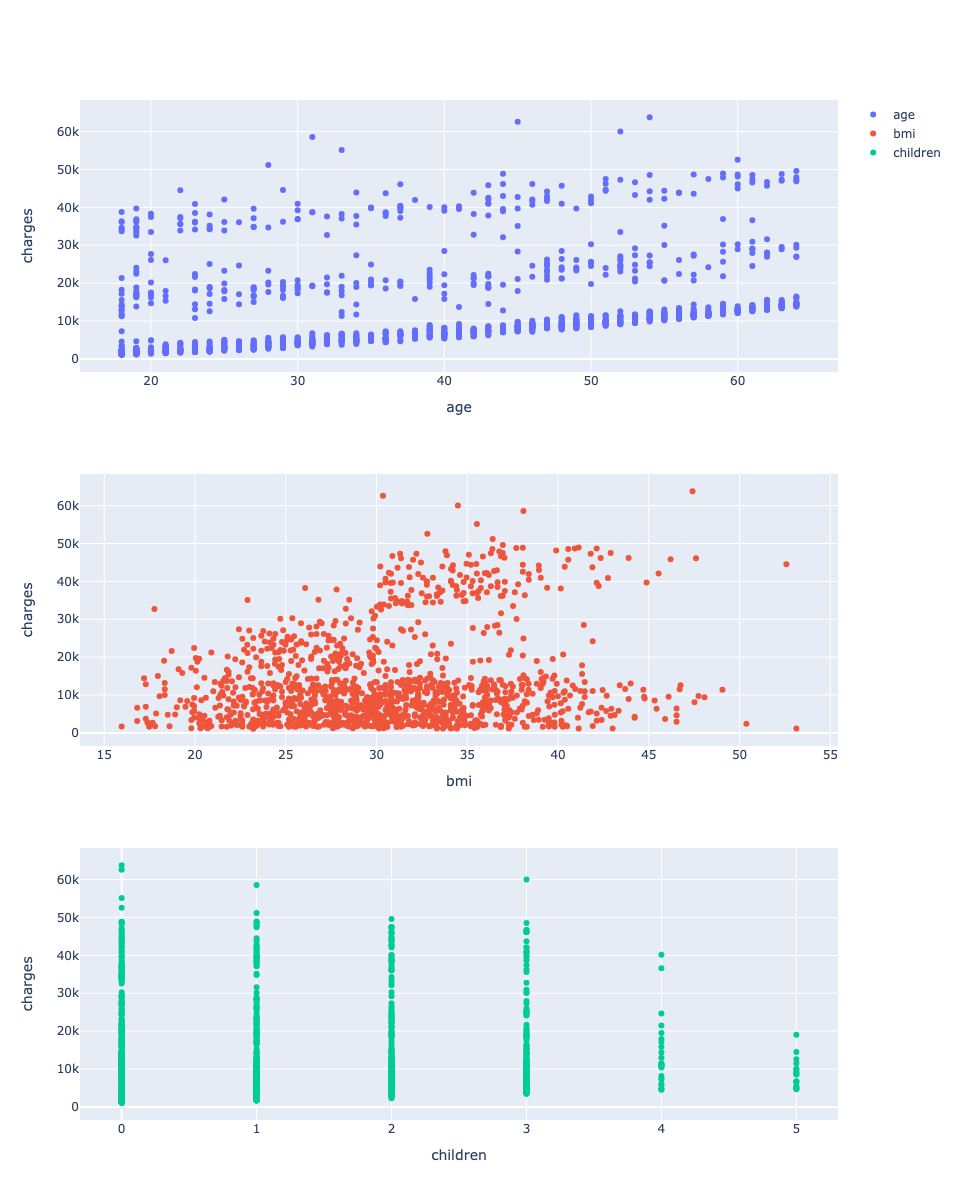

In [16]:
plot_univariate_numeric(
    X.select_dtypes(include=np.number), 
    y
)

Points to note regarding each feature:

* `age` - As `age` increases, `charges` also tends to increase (although there is a large variance in `charges` for a given `age`).
* `bmi` - There is no clear relationship, although there seems to be a group of individuals with `bmi` > 30 that have `charges` > 30k. This group may become more apparent when we carry out our bivariate analysis later.
* `children` - No clear relationship (although `charges` seems to decrease as `children` increases). **Since there are only 6 unique values for this feature, let's try treating it as a categorical feature for the purposes of univariate analysis.**

#### Categorical features

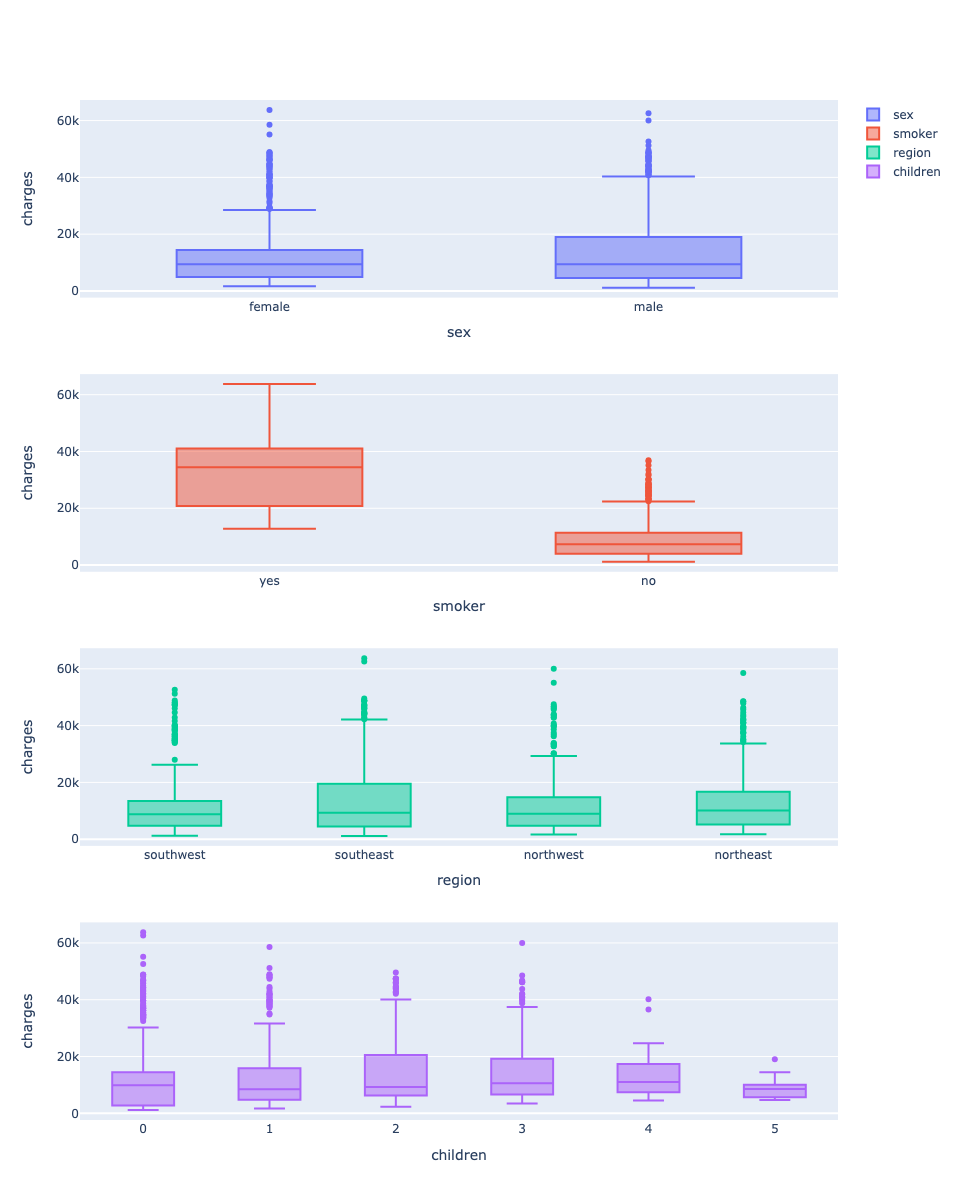

In [17]:
plot_univariate_categorical(
    X[['sex', 'smoker', 'region', 'children']], 
    y
)

Points to note regarding each feature:

* `sex` - No significant differences in `charges` between the categories.
* `smoker` - `charges` for `smoker` == 'yes' are generally much higher than when `smoker` == 'no'.
* `region` - No significant differences in `charges` between the categories.
* `children` - No significant differences in `charges` between the categories (`children` >= 4 are skewed towards lower `charges`, but this is likely due to the low volumes in those categories - see the **Distributions** section).

### **Bivariate analysis (with respect to the target)**

Let's now apply bivariate analysis with respect to the target. This means that we take pairs of features and see how they relate to the target.

The way in which we do this depends on whether the feature pairs are all numeric, all categorical or a mixture of categoric and numeric. For all numeric pairs, we'll use a heatmap; for all categorical pairs, we'll use boxplots; for categorical-numeric pairs, we'll use a scatterplot. 

#### **Numeric pairs**

##### **Correlation Heatmap**
 
A correlation heatmap is a heatmap that depicts a two-dimensional correlation matrix between two discrete dimensions, with colored pixels representing data on a color scale. The values of the first dimension are displayed as rows in the table, while the values of the second dimension appear as columns. The cell's hue is proportional to the number of measurements corresponding to the dimensional value.
 
This makes correlation heatmaps great for data analysis since they show differences and variances in the same data while making patterns clearly accessible. A correlation heatmap, like a standard heatmap, is aided by a color bar to make data more legible and understandable.

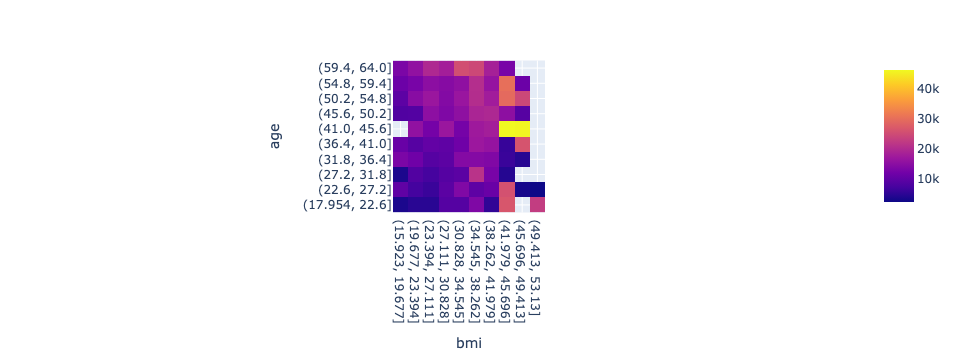

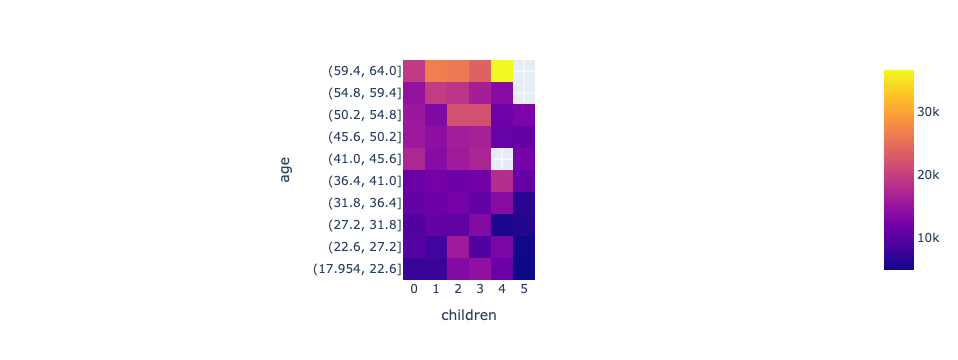

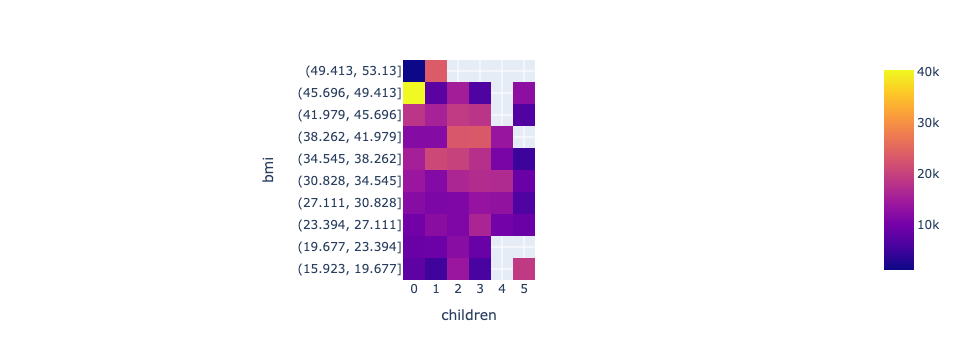

In [18]:
plot_heatmap(
    X[['age', 'bmi', 'children']], 
    y,
    bins=10
)

No additional insight can be gained from these plots that we haven't already obtained from the univariate analysis.

#### **Categorical pairs**

**Box Plots**


A box and whisker plot, often known as a box plot, shows a five-number summary of a collection of data. The minimum, first quartile, median, third quartile, and maximum are the five-number summary. A box plot is created by drawing a box from the first to third quartiles which is the Inter Quartile Range (IQR). At the median, a vertical line runs through the box.

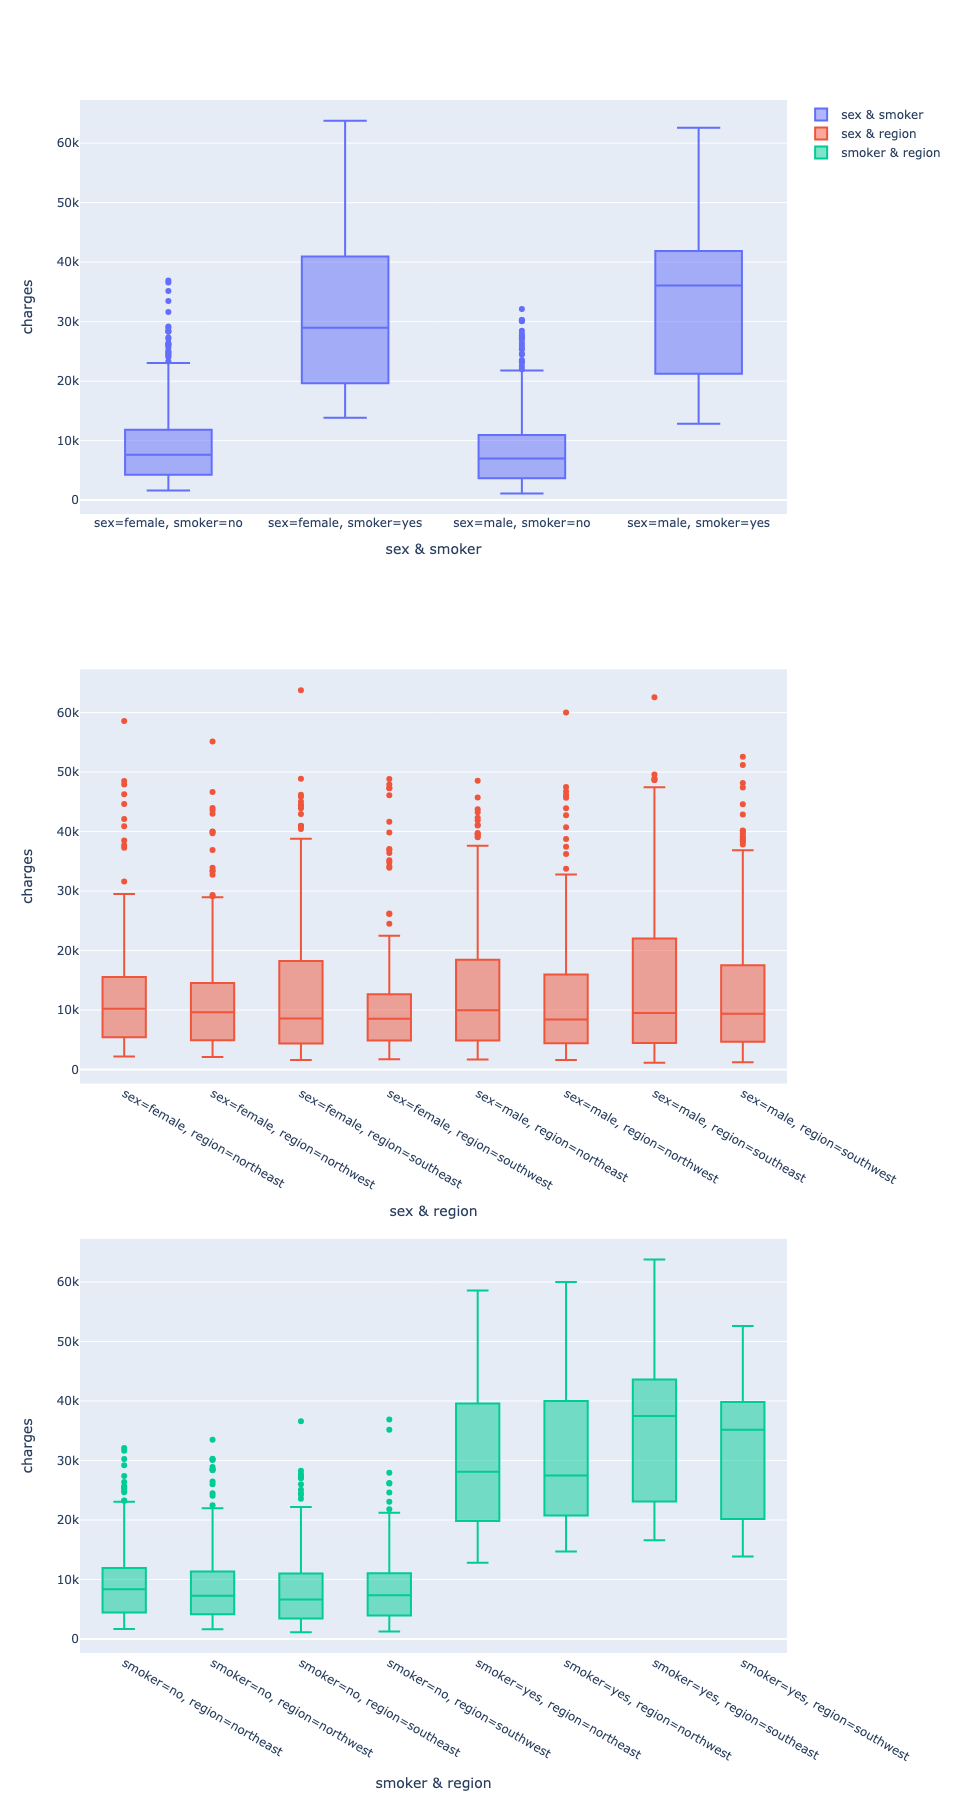

In [19]:
plot_paired_boxplots(
    X[['sex', 'smoker', 'region']], 
    y
)

Points to note regarding these feature pairs:

* `sex`-`smoker` - The median `charges` is higher for males who smoke compared to females who smoke (36k vs 29k)
* `smoker`-`region` - The median `charges` is higher for smokers in the southwest and southeast vs the northeast and northwest (35k and 37k vs 28k and 27k)

#### **Numeric-categorical pairs**

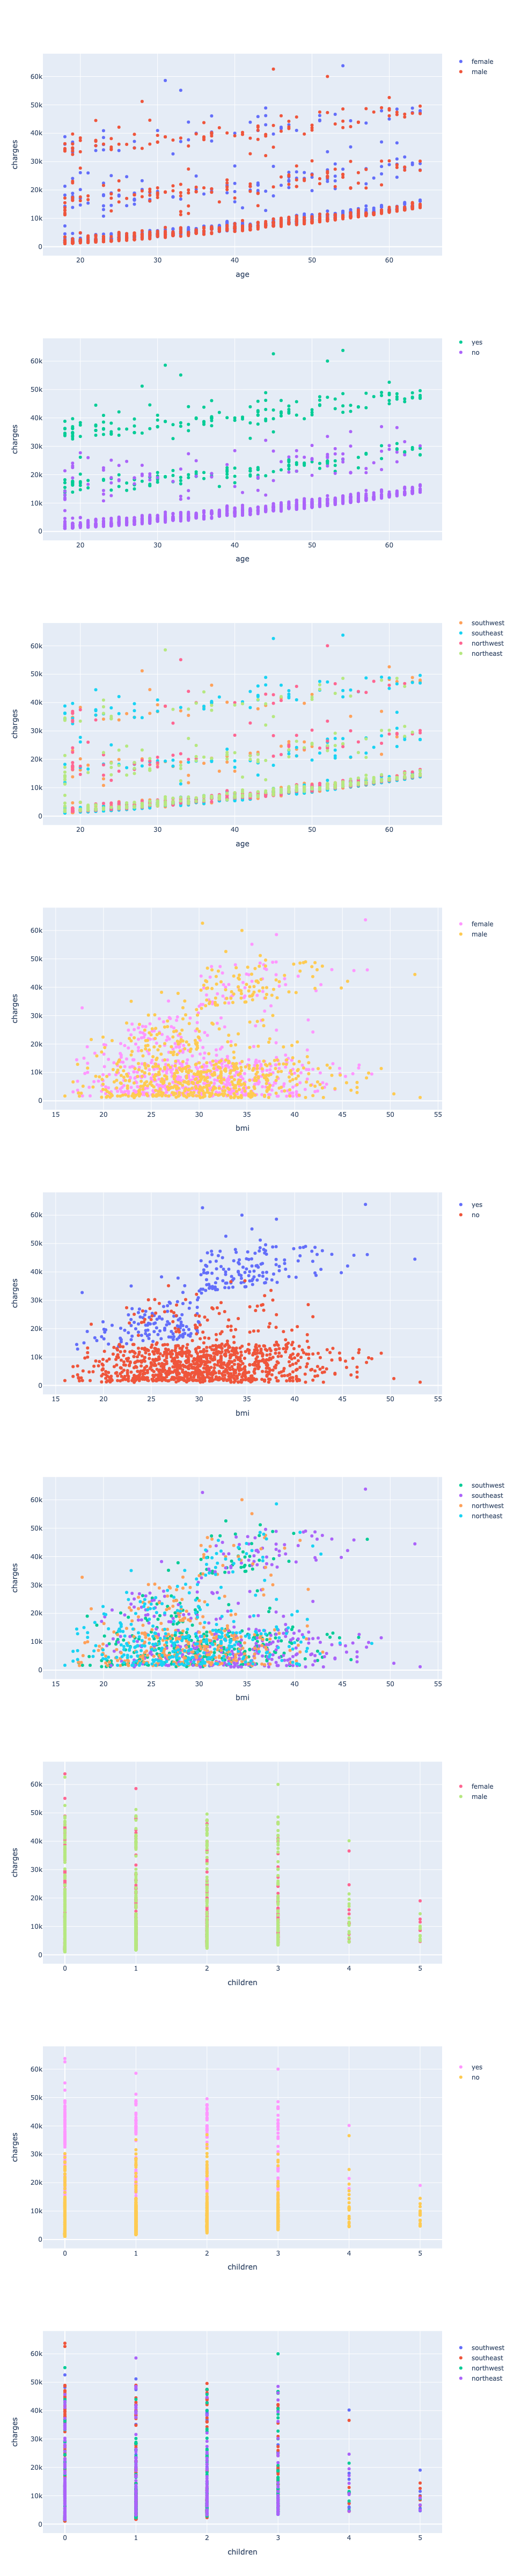

In [20]:
plot_paired_scatterplots(X, y)

There are two pieces of insight from these graphs:

* `age`-`smoker` - There is a group in the bottom left hand quadrant of the chart (where `age` < 50 and `smoker` = 'no') where all beneficiaries have health care costs below 10k (which is relatively small compared to the rest of the population).
* `bmi`-`smoker` - There is a group in the top right hand quadrant of the chart (where `bmi` > 30 and `smoker` = 'yes') where all beneficiaries have health care costs above 30k (which is relatively large compared to the rest of the population).

### **Collinearity (between features)**

Now let's look at collinearity (i.e correlation) between features.

The way in which we do this depends on whether the feature pairs are all numeric, all categorical or a mixture of categoric and numeric. For all numeric pairs, we'll use the **Pearson's correlation**; for all categorical pairs, we'll use a **$\chi^2$ test**; for categorical-numeric pairs, we'll use an **Analysis of Variance (ANOVA) test**. 

#### **Numeric features**

First, let's use a pairplot to see how each pair of numeric features relate to one another:

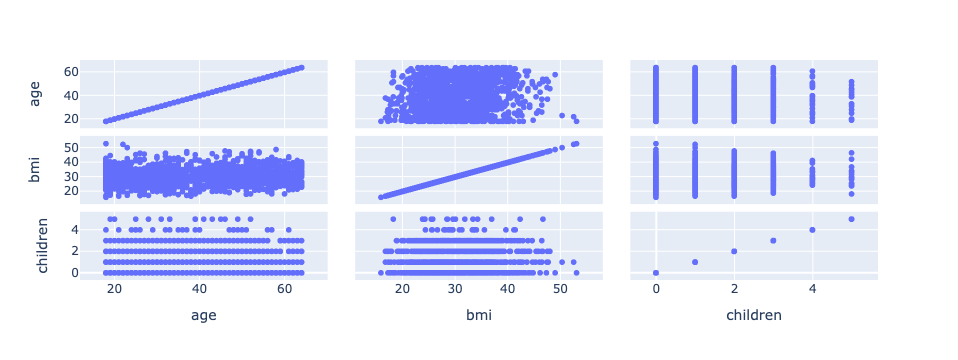

In [21]:
px.scatter_matrix(
    X.select_dtypes(include=np.number)
)

There doesn't look like there's much correlation between any of the numeric features. To be sure, let's calculate and plot the **Pearson's correlation matrix**:

**Correlation**

Correlation coefficient is used to measure the strength of relationship between two variables. It indicates that as the value of one variable changes the other variable changes in a specific direction with some magnitude. There are various ways to find correlation between two variables, one of which is Pearson correlation coefficient.
It measures the linear relationship between two continuous variables.
 
Let's say $x$ and $y$ are two continuous variables, the Pearson correlation coefficient between them can be found by the following formula.
 
 
$$r = \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
 
where $x_i$ and $y_i$ represents the $i^{th}$ value of the variables.
The value of $r$ ranges between $-1$ and $+1$.
 
Their strength of relationship is measured by the absolute value of coefficient, whereas the sign of the coefficient indicates the direction of the relationship.
 



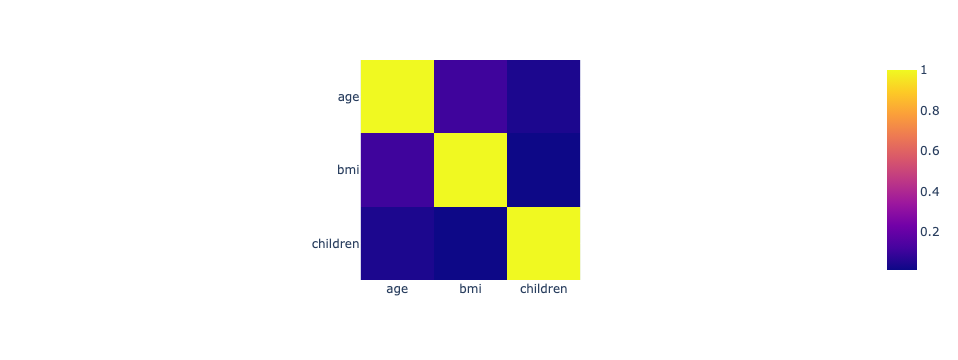

In [22]:
px.imshow(X.select_dtypes(include=np.number).corr())

This suggests there is very little correlation between the numeric features - the highest being a Pearson's correlation of 0.11.

#### **Categorical features**

 **Chi Squared Test**

A sample's distribution of a categorical variable must frequently be compared to the distribution of a categorical variable in another sample.

The chi squared test of independence, often known as the chi squared test of association, is used to detect whether or not categorical variables are related. 

The data must meet the following requirements for this test:

* Categorical variables
* Sample size is relatively large
* Independent observations

The chi squared test is performed in the following steps:
* Find a "expected" number (E) for each observed number (0) in the table.

$$χ^2  = \frac{∑(O_i – E_i)^2}{E_i}$$

* A chi-square test will provide us with a p-value. The p-value indicates whether or not our test results are significant.

However, in order to do a chi-square test and calculate the p-value, we need two pieces of information:

* Degrees of freedom. That is simply the number of categories minus one.

* Significance Level. The standard alpha level is 0.05 (5%), but alternative values such as 0.01 or 0.10 are possible.

* The following are the different values of p that indicate different hypothesis interpretations:

* P = 0.05; Hypothesis is rejected
* P > 0.05; Acceptance of Hypothesis

For categorical features, we'll use a Chi Squared ($\chi^2$) test to observe whether each categorical feature pair is correlated.

First, we calculate the $\chi^2$ values, p-values and degrees of freedom:

In [23]:
X_chi2 = chi2(X.select_dtypes(object))

In [24]:
X_chi2

column1 column2  chi_squared   p_value  dof
0     sex  smoker     7.392911  0.006548    1
1     sex  region     0.435137  0.932892    3
2  smoker  region     7.343478  0.061720    3

Since there are only three different categorical feature pairs, we won't plot the results.

We can use the p-value (which is derived from the $\chi^2$ result and the degrees of freedom) to test how likely the observed distribution (for each feature pair) happened due to chance. For example, a p-value of 0.5 means that there is a 50% probability of observing the distribution by chance. 

A threshold of < 0.05 is widely accepted for rejecting the null-hypothesis (that the features are independent) since this means that there is only a 5% probability of observing the distribution by chance.

The only feature pair with a p-value less than this threshold is `sex` and `smoker`, which means it's likely that these features are correlated:

In [25]:
X_chi2[X_chi2['p_value'] < 0.05]

column1 column2  chi_squared   p_value  dof
0     sex  smoker     7.392911  0.006548    1

#### **Numeric-categorical feature pairs**

**ANOVA**



For numeric-categorical feature pairs, we'll use an ANOVA test. ANOVA stands for Analysis of Variance - it helps us to understand if there are statistically significant differences between the means of independent groups.



ANOVA is an abbreviation for Analysis of Variances, which evaluates the differences between group means. It's a statistical hypothesis test that looks to see if the means of at least two populations differ. To run ANOVA, we require at least one continuous variable and one categorical variable that separates your data into comparison groups. The term "analysis of variances" refers to how the test uses variances to determine whether the means are different.


ANOVA compares the variance of group means to the variance of the groups. This procedure establishes if the groups are part of a bigger population or if they are separate populations with different means.

Despite the fact that it analyses variations, it tests means. One way ANOVA is the most basic sort of ANOVA. This method is a generalisation of t tests that can be used to compare more than two groups.

The null hypothesis is that all groups have same mean and the alternate hypothesis is that atleast one group has different mean.

First, we calculate the $F$ values (the ratio of the between- and within-group mean squares) and p-values:

In [26]:
X_anova = anova(X)

In [27]:
X_anova

num_column cat_column     f_stat       p_value
0        age        sex   0.581369  4.459107e-01
1        age     smoker   0.836777  3.604853e-01
2        age     region   0.079782  9.709891e-01
3        bmi        sex   2.878970  8.997637e-02
4        bmi     smoker   0.018792  8.909850e-01
5        bmi     region  39.495057  1.881839e-24
6   children        sex   0.393659  5.304898e-01
7   children     smoker   0.078664  7.791596e-01
8   children     region   0.717493  5.415543e-01

Similar to the $\chi^2$ test above, we can use the p-value to test how likely the observed distribution (for each feature pair) happened due to chance. We will again apply the threshold of < 0.05 isfor rejecting the null-hypothesis (that the features are independent).

The only feature pair with a p-value less than this threshold is `bmi` and `region`, which means it's likely that these features are correlated:

In [28]:
X_anova[X_anova['p_value'] < 0.05]

num_column cat_column     f_stat       p_value
5        bmi     region  39.495057  1.881839e-24

### **Correlation (with respect to the target)**

Now we will calculate the correlation between the features and the target. This will be useful when it comes to building our baseline linear model.

We can apply the same techniques that we used when calculating collinearity between features.

#### **Numeric features (with respect to the target)**

Here, we'll calculate the Pearson's Correlation between each numeric feature and the target:

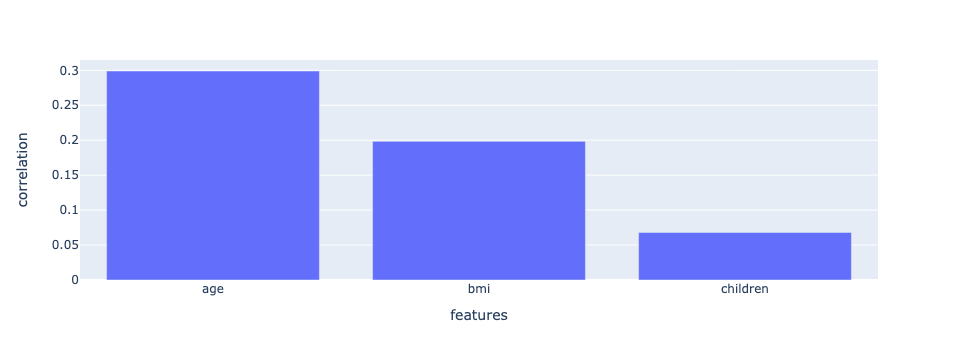

In [29]:
plot_pearson_wrt_target(X, y)

The `children` feature has a very low correlation with respect to the target.

#### **Categorical features (with respect to the target)**

Here, we'll apply the ANOVA test. Note that since we're only interested in comparing each categorical feature to the target, we filter out the results of all other numeric features:

In [30]:
data_anova = anova(data) # Use data as it contains the target

anova_wrt_target = data_anova[data_anova['num_column']=='charges']

In [31]:
anova_wrt_target

num_column cat_column       f_stat        p_value
9     charges        sex     4.399702   3.613272e-02
10    charges     smoker  2177.614868  8.271436e-283
11    charges     region     2.969627   3.089336e-02

In [32]:
anova_wrt_target[anova_wrt_target['p_value']<0.05]

num_column cat_column       f_stat        p_value
9     charges        sex     4.399702   3.613272e-02
10    charges     smoker  2177.614868  8.271436e-283
11    charges     region     2.969627   3.089336e-02

All p-values are < 0.05, which means that the differences observed in the `charges` column when comparing the categories within a categorical variable are statistically significant. **Note however that this doesn't measure the magnitude of the differences observed.**

---

## **Build and evaluate a baseline linear model**

### **Linear regression assumptions**

A linear regression model has the following assumptions:
    
1. **Independence of observations:** Different observations are not related.
2. **Linearity:** A linear relationship between the target and features.
3. **Independence:** Little or no collinearity between features.
4. **Normality of residuals:** The residuals are normally distributed.
5. **Homoscedasticity:** The residuals have the same variance across values of the target.

Note that:

* Assumption 1 is true for this dataset, as a given beneficiary's health cost charge should not be related to another. 
* We'll use assumptions 2-3 to inform how we process the data.
* We'll use assumptions 4-5 to check our linear model is fit for purpose.

### **Data preprocessing**

It's always best practise to split your dataset into a training set (which we use for training any data processing steps and the model itself) and a test set (which we only use for model evaluation). 

**We can then be more confident in the performance of our model on unseen data.**

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
)

#### **Remove unnecessary columns**

After our EDA, we concluded that the `children` feature is not strongly correlated to `charges`. This violates Assumption 2 of a linear regression model, so we should remove this feature from our training set. 

Also, our $\chi^2$ test suggested the `sex` feature is correlated to the `smoker` feature, and our ANOVA test suggested the `region` feature is correlated to the `bmi` feature. This violates Assumption 3 of a linear regression model, so we should remove these features from our training set. We will remove the `sex` and `region` features, since these had weaker predictive power with respect to the target.

In [34]:
cols_to_drop = [
    'children',
    'region',
    'sex'
]
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

#### **Encoding**

 **One - Hot Encoding**

Most Machine Learning algorithms are unable to deal with categorical data and must be transformed to numerical data.
What are our options for converting categorical data to numerical data? Should we number the labels? For example, red represents 0 and blue represents 1. It will cause a bias in the model since the model will consider blue to be superior to red.

To address this, we use a categorical data encoding approach known as one hot encoding. In this method, we build a new feature for each label and assign it a value of 1. For example, if blue is present, it is marked as 1, else it is 0.

Now, we need to encode our categorical features - this means transforming them into numeric features so the model can interpret them. 

There are many encoding methods, but in this example we'll use One Hot Encoding, which creates a boolean column for each category in each categorical feature.



##### **Did you know - I**

Notice that we fit the encoder on the training set, but only transform the test set. This ensures that only the categories found in the training set are one hot encoded (which prevents **data leakage** - when information outside the training set is used to build the model). 

A supervised algorithm's goal is to generate predictions about data that the algorithm has never seen before. As a result, while training an algorithm to predict validation and test splits, practitioners must ensure that the algorithm does not obtain access to knowledge about such splits inadvertently. By encoding the labels all at once before dividing, you indirectly indicate that you already know what are the possible classes or numeric ranges we are going to see in the future. Depending on the definition, this could be defined as data leaking, because you can deduce information that isn't in the training set.

Notice we will use fit and transform on the training set and just transform on the test set which essentially means that the one hot encoder object is trained or fitted by seeing the values of just the training set.

In [35]:
pd.__version__

'1.5.3'

In [36]:
X_train.iteritems = X_train.items
ohe = OneHotEncoder(cols='smoker', use_cat_names=True)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test) #to prevent data leakage

Since the `smoker` feature only has two categories, we can drop the encoded `smoker_no` column, since it doesn't provide any additional information:

In [37]:
cols_to_drop = ['smoker_no']
X_train.drop(cols_to_drop, axis=1, inplace=True)
X_test.drop(cols_to_drop, axis=1, inplace=True)

#### **Transformation of the target**

We saw in the **EDA** section that the target was not normally distributed. A model trained using this target will likely produce residuals that **do not** have the same variance across values of the target (i.e. assumption 5 of the linear regression model will be violated).

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

Currently, PowerTransformer supports the Box-Cox transform and the Yeo-Johnson transform.

So we'll use the **Yeo-Johnson** transformation to ensure our target is more normally distributed:

In [38]:
pt = PowerTransformer(method='yeo-johnson')
y_train_t = pt.fit_transform(y_train.values.reshape(-1, 1))[:, 0]
y_test_t = pt.transform(y_test.values.reshape(-1, 1))[:, 0]

Now let's quickly check whether this has had the desired effect (on both training and test sets):

<Axes: >

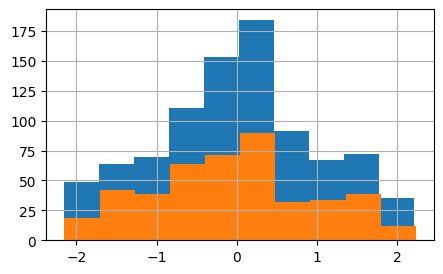

In [39]:
pd.Series(y_train_t).hist(figsize=(5, 3))
pd.Series(y_test_t).hist(figsize=(5, 3))

### **Model training**

Now that our dataset has been sufficiently processed, we can train our baseline linear regression model.

To improve homoscedasticity of the residuals, we can pass sample weights to the model. This ensures that when the model is trained, observations with larger `charges` are given more importance than those with smaller `charges`. This means that residuals are penalised more heavily for the observations with larger `charges` vs those with smaller `charges`.

We'll use the target column as the sample weight, but scale it by the minimum value of the `charges` column (so the minimum sample weight is 1):

In [40]:
sample_weight = y_train / y_train.min()

Finally, we can train our linear regression model by passing it our training set and sample weights:

In [41]:
lr = LinearRegression()
lr.fit(
    X_train, 
    y_train_t, 
    sample_weight=sample_weight
)

LinearRegression()

### **Model evaluation**

Now that we've trained our model, we can use it to generate predictions on both our training and test sets:

In [42]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

Remember that the model was trained based on a transformed version of the target. Therefore we need to perform the inverse **Yeo-Johnson** transform to convert the model predictions to the original format of the target:

In [43]:
y_pred_train = pt.inverse_transform(y_pred_train.reshape(-1, 1))[:, 0]

y_pred_test = pt.inverse_transform(y_pred_test.reshape(-1, 1))[:, 0]

With our predictions, we can evaluate our model:

In [44]:
base_perf_train = calc_model_performance(y_train, y_pred_train)

In [45]:
base_perf_train

{'Root Mean Squared Error': 5964.030079525293,
 'Mean Squared Error': 35569654.789482474,
 'Mean Absolute Error': 4583.192074027689,
 'Mean Absolute Percentage Error': 0.7487184929524597,
 'R Squared': 0.7572131565075644}

In [46]:
base_perf_test = calc_model_performance(y_test, y_pred_test)

In [47]:
base_perf_test

{'Root Mean Squared Error': 5752.477398059848,
 'Mean Squared Error': 33090996.215189405,
 'Mean Absolute Error': 4534.422635060566,
 'Mean Absolute Percentage Error': 0.7565371511851343,
 'R Squared': 0.7741917232715532}

**So our evaluation metric for the model (RMSE) is ~5964 on the training set and ~5752 on the test set.**

### **Check normality of residuals**

We can check the normality of residuals using a QQ (quantile-quantile) plot. This plots the value of each actual quantile (from the data) vs the theoretical quantile (assuming a normal distribution). If the data is perfectly normally distributed, you'd expect the datapoints to lie on the line.

We'll also use a histogram as a more interpretable visualisation of the residuals.

In [48]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

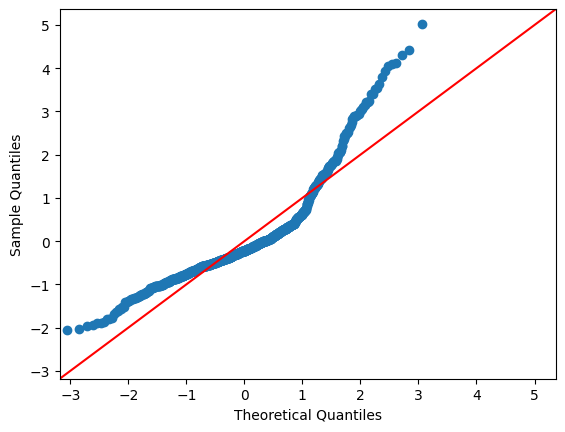

In [49]:
fig = sm.qqplot(
    residuals_train, 
    fit=True, 
    line='45'
)

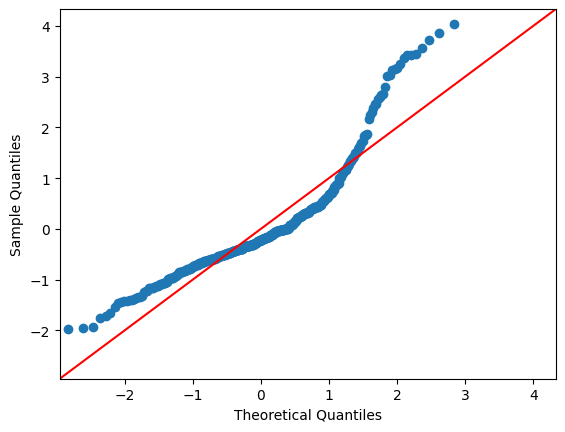

In [50]:
fig = sm.qqplot(
    residuals_test, 
    fit=True, 
    line='45'
)

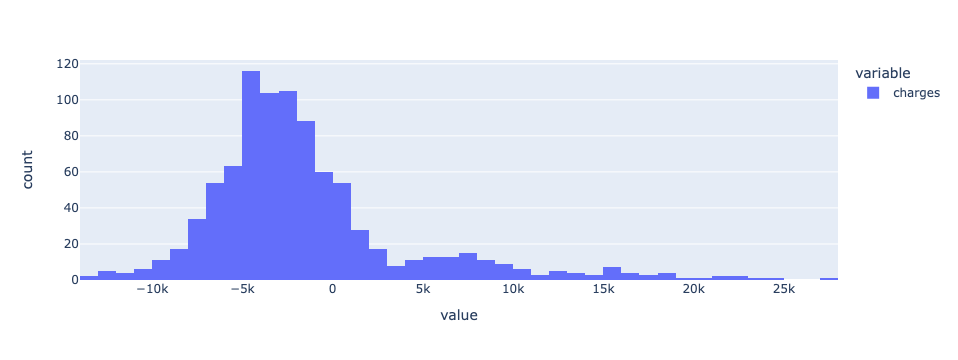

In [51]:
plot_residuals(y_true=y_train, y_pred=y_pred_train)

Our residuals are not perfectly normally distributed, but are pretty close!

### **Check homoscedasticity**

We can check for homoscedasticity using a scatterplot, where the target is shown along the x-axis and the residuals are shown along the y-axis. We would expect the datapoints to be equally distributed across the y-axis as x (i.e. the target value) increases:

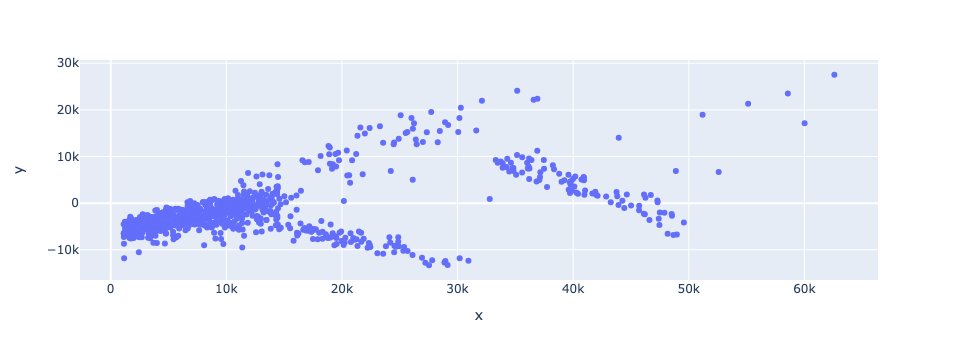

In [52]:
px.scatter(x=y_train, y=residuals_train)

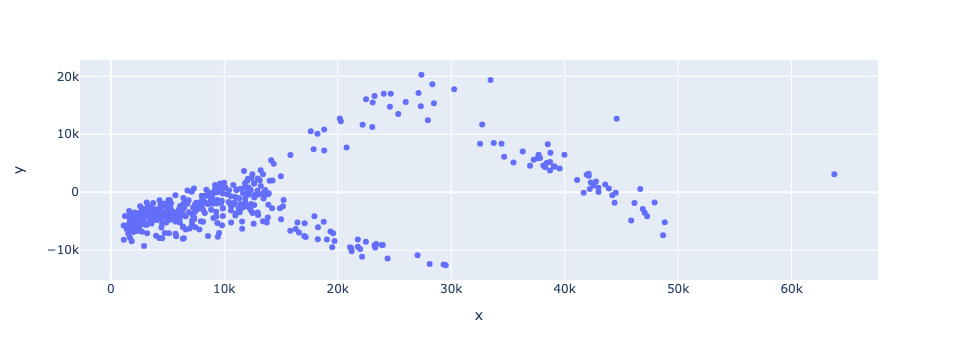

In [53]:
px.scatter(x=y_test, y=residuals_test)

Our model exhibits significant heteroscedasticity (i.e. the variance of the residuals is not homogeneous with respect to the target). Since this is a baseline model, we will not spend additional time attempting to improve this.

---

## **Improve on the baseline linear model**

Now let's try to improve upon our linear regression model by training a non-linear model. Here, non-linear refers to the fact that the model can learn non-linear relationships from the data.

Before moving on to XGBoost Regressor let's understand Decision Trees.

**Decision Tree**

Decision trees, often known as CART or Classification and Regression Trees, are versatile supervised machine learning algorithms capable of performing both regression and classification problems. and can also be used for operations with multiple classes as well. The name implies that it uses a tree-like flowchart to display the predictions that come from a sequence of feature-based splits. It begins with a root node and finishes with a leaf decision. It can be used to portray decisions and decision-making in a visual and explicit manner. The root of a decision tree is at the top, and this root is split into multiple nodes.

In layman's terms, decision trees are nothing more than a series of if-else statements. It determines whether the condition is true, and if so, it proceeds to the next node related with that choice.

**Decision Tree and Overfitting**

Choosing which features to use and what conditions to use for splitting, as well as understanding of when to stop, are all part of the process of growing a tree. All of the features are taken into account, and several split points are tested using a cost function and many of the branches may also reflect noise or outliers in the training data. The split with the lowest entropy is chosen. This is an example of recursive algorithm because the groups generated can be subdivided using the same approach and is also known as the greedy algorithm because it will exhaust all the features and conditions in order to reach the lowest cost, even if the algorithm ends up overfitting the dataset. In a decision tree, overfitting occurs when the tree is designed so as to perfectly fit all samples in the training dataset.

The cost function or in this case Information Gain finds the feature to split so that the most homogeneous branches can be created. As a result, you can map the choice of a particular homogeneous class at the end to all features involved since the top, and the tree will link that homogenous class to those set of features. As a dataset usually has a number of features, it results in large number of splits, which in turn gives a huge tree. Such trees are complex and can lead to overfitting because the tree will learn each feature value for a particular observation as the tree grows till it's maximum depth and when a new observation is tested it will generate large errors. Hence, decision trees are particularly really prone to overfitting.


**Bagging and Boosting**
Now let us understand Ensembling particularly, Bagging and Boosting. Bagging and Boosting are types of ensemble learning techniques where that decrease the variance of a single estimator by combing the power of multiple learners. The significant difference is that bagging involves averaging numerous learners' results and boosting covers sequentially, building strong learners by penalizing errors for weak early learners. Watch the reference video below to know more.

**Boosting**

The term 'boosting' refers to a set of algorithms that help weak learners become strong.
Boosting algorithms, unlike many machine learning models, aim to improve prediction ability by training a series of weak models, each one correcting for the faults of its predecessors. It's done by stringing together weak models to create a model. To begin, a model is created using the training data. The second model is then created, which attempts to correct the faults in the previous model. This approach is repeated until either the entire training data set is properly predicted or the maximum number of models specified has been created.

It's important to remember that boosting is a generic method, not a specific model, in order to comprehend it. Boosting involves specifying a weak model, such as regression or decision trees, and then improving it. In Ensemble Learning, the primary difference between Bagging and Boosting is that in bagging, weak learners are trained in simultaneously, but in boosting, they are trained sequentially. This means that each new model iteration increases the weights of the prior model's misclassified data. This redistribution of weights aids the algorithm in determining which parameters it should focus on in order to increase its performance.

Both the Ensemble techniques are used in a different way as well.  Bagging methods, for example, are often used on poor learners who have large variance and low bias such as decision trees because they tend to overfit, whereas boosting methods are employed when there is low variance and high bias. While bagging can help prevent overfitting, boosting methods are more vulnerable to it because of a simple fact they continue to build on weak learners and continue to minimise error. This can lead to overfitting on the training data but specifying a decent number of models to be generated or hyperparameter tuning,  regularization can help in this case, if overfitting encountered.

**Gradient Boosting**

The primary idea behind this technique is to develop models in a sequential manner, with each model attempting to reduce the mistakes of the previous model.The additive model, loss function, and a weak learner are the three fundamental components of Gradient Boosting.

The method provides a direct interpretation of boosting in terms of numerical optimization of the loss function using Gradient Descent. We employ Gradient Boosting Regressor when the target column is continuous, and Gradient Boosting Classifier when the task is a classification problem. The "Loss function" is the only difference between the two. The goal is to use gradient descent to reduce this loss function by adding weak learners. Because it is based on loss functions, for regression problems, Mean squared error (MSE) will be used, and  for classification problems, log-likelihood.

### **Introduction to a non-linear model - XGBoost**

XGBoost (eXtreme Gradiant Boost) is a gradient-boosted, decision-tree based algorithm. It is the top performing algorithm in many Kaggle competitions, so is an ideal candidate to apply to this use case.

XGBoost for regression is trained using the following process:

1. Make an initial prediction (usually just the value `0.5`)
2. Calculate the residuals of each observation (compared to this initial prediction)
3. Fit a regression decision tree to the residuals:
    1. Calculate similarity score for the observations in each leaf: 
        1. $S = \frac{\Sigma[R]^2}{N_R + \lambda}$, where $R$ is the residual value, $N_R$ is the number of residuals and $\lambda$ is a regularisation parameter.
    2. Then try splitting the leaf nodes further to improve upon the clustering of similar residuals:
        1. For each split, the similarity score is calculated for the left and right leaf nodes. 
        2. The improvement by splitting is quantified using the gain: $G = S_{left} + S_{right} - S_{root}$
        3. Choose the split that maximises the gain.
    3. Repeat these three steps until the minimum number of observations per leaf is reached (see `min_child_weight` parameter in XGBoost API) or until the maximum depth is reached (see `max_depth` parameter in XGBoost API).
4. The regression decision tree is then pruned based on the gain value of each split, using a threshold $\gamma$ (see `gamma` parameter in XGBoost API):
    1. For the lowest split in the tree, if $G$ < $\gamma$ , then the split is removed; if it is positive, the split is kept.
    2. Repeat this process for each split, moving up towards the root (and including the root itself)
5. Once the regression decision tree is pruned, calculate the output value of each leaf: $O = \frac{\Sigma(R)}{N_R + \lambda}$
    1. **Note:** when $\lambda > 0$ it will reduce the amount an individual leaf adds to the overall prediction, reducing the final prediction's sensitivity to the individual tree’s prediction (see `reg_lambda` parameter in XGBoost API).
6. Then combine the initial prediction with the prediction from the regression decision tree (scaled by a learning rate, $\eta$ - see `learning_rate` parameter in XGBoost API) to get a new prediction: $Pred_{new} = Pred_{init} + \eta * Pred_{residual}$.
7. Repeat steps 1-6 until the residuals have reached a certain threshold or until the maximum number of trees have been reached (see `n_estimators` parameter in XGBoost API).

### **Data preprocessing**

Let's create a new training and test set (since the training and test sets we created for the baseline linear model have been transformed). 

**Note:** we use the same value for the `random_seed` parameter to ensure the observations in these training and test sets are the same as those in the training and test sets used for the baseline linear model:

#### **Train/test split**

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.33, 
    random_state=42
)

#### **Encoding**

We still need to encode the categorical features, so let's apply One Hot Encoding again:

In [55]:
ohe = OneHotEncoder(use_cat_names=True)
X_train = ohe.fit_transform(X_train)
X_test = ohe.transform(X_test)

### **Using Sklearn's `Pipeline` to optimise the model training process**

As mentioned in the introduction, the XGBoost algorithm has a number of parameters that can affect the predictive performance of the model. Rather than trying to optimise these parameters manually, we can leverage Sklearn's `Pipeline` class, along with Skopt's `BayesSearchCV` class, to optimise them automatically. 

We'll also use Recursive Feature Elimination (RFE) in this process to optimise the features that are used by the final XGBoost model. RFE works by fitting a model to all of the features, then calculating the feature importance. The least important feature is removed, then another model is trained using this dataset. This process is repeated until the desired number of features to select is reached.

Firstly, let's create our RFE and XGBoost regressor instances. We'll also use an XGBoost regressor as the model in our RFE.

In [56]:
rfe = RFE(estimator=XGBRegressor())
xgb = XGBRegressor()

Now we create our pipeline by specifying the list of sequential processes we want to run. The output of each step is passed to the next, with the final step being an estimator (i.e. model). In this case, we want to:

1. Apply feature selection (via RFE)
2. Train the XGBoost regressor

We do this by creating a list of tuples, where the first element of each tuple is a label for the step, and the second element is the class to run:

In [57]:
steps = [
    ('rfe', rfe),
    ('xgb', xgb)
]

Then we pass this to the `Pipeline` class:

In [58]:
pipe = Pipeline(steps)

When the `fit` method of the pipeline is called, it will pass the features and target to the RFE `fit_transform` method. The output of this will be passed to the `fit` method of the XGBoost regressor.

Now that we have our pipeline defined, we can set up our `BayesSearchCV` class to optimise the parameters of the pipeline. Firstly, we need to define the parameters we want to optimise and the space over which the `BayesSearchCV` should search. Note that since we're using a pipeline, we need to define the parameters related to each step by adding a prefix, which is the step's label and two underscores (e.g. `xgb__` for the XGBoost step):

In [59]:
num_features = X_train.shape[1]
search_spaces = {
    'rfe__n_features_to_select': Integer(1, num_features), # Num features returned by RFE
    'xgb__n_estimators': Integer(1, 500), # Num trees built by XGBoost
    'xgb__max_depth': Integer(2, 8), # Max depth of trees built by XGBoost
    'xgb__reg_lambda': Integer(1, 200), # Regularisation term (lambda) used in XGBoost
    'xgb__learning_rate': Real(0, 1), # Learning rate used in XGBoost
    'xgb__gamma': Real(0, 2000) # Gamma used in XGBoost
}

Once our search space for each parameter is defined, we pass this, along with our pipeline, to the `BayesSearchCV` class. This works by:
1. Creating a cross validation dataset of $n$ folds, where each fold has the same number of observations. For example, for 3 folds, the original dataset is randomly split into 3 subsets.
2. The following steps are then applied across all folds:
    1. Create a sub-training set comprising of $n$-1 folds and a sub-validation set comprising of the remaining fold. 
    2. Train the pipeline using a given set of parameters on the sub-training set.
    3. Use this trained pipeline to make predictions on the sub-validation set and calculate the scoring metric (i.e. the RMSE in this case).
3. Calculate the mean of the scoring metric across all sub-validation sets.
4. The algorithm then uses a bayesian approach to select the next set of parameters which will maximise the mean scoring metric across all sub-validation sets.
5. Steps 2-4 are repeated until a threshold is reached (see the `n_iter` parameter in the `BayesSearchCV` class).

**BayesSearchCV**

This method use stepwise Bayesian Optimization to investigate the most promising problem-space hyperparameters.
In large problem spaces, Bayesian Optimization determines the minimum to an objective function. Under the hood, it employs Gaussian Process regression on the objective function to do this. In our example, the objective function is to find the optimal model output given the model parameters we specify.
The Bayesian Optimization approach has the advantage of providing a significantly greater range of possible values because it automatically explores the most promising regions and discards the less promising ones over time.

A simple grid-search would take a lot of time to exhaust all possible values.
Because we move much more efficiently, we can create a much larger playing field.

Bayesian Optimization keeps track of previous evaluation results, which they use to build a probabilistic model mapping hyperparameters to the probability of a score on the objective function. It is basically finding out the most promising hyperparameters by building a probability model of the objective function.

P = (score | hyperparameters)

This probability function works as a "surrogate" for objective functions. Hyperparameters are tested on this and those who stand out are then tested on the trtue objective function which would a function that minimizes error. The results then updates the surrogate function again and in this way, bayesian optimization selects parameters in an informed manner.

In [61]:
xgb_bs_cv = BayesSearchCV(
    estimator=pipe, # Pipeline
    search_spaces=search_spaces, # Search spaces
    scoring='neg_root_mean_squared_error', # BayesSearchCV tries to maximise scoring metric, so negative RMSE used
    n_iter=75, # Num of optimisation iterations
    cv=3, # Number of folds
    n_jobs=-1, # Uses all available cores to compute
    verbose=1, # Show progress
    random_state=0 # Ensures reproducible results
)

Now we can initiate the parameter optimisation process using our training set:

In [62]:
xgb_bs_cv.fit(
    X_train, 
    y_train,
)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


//anaconda3/lib/python3.10/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
//anaconda3/lib/python3.10/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
//anaconda3/lib/python3.10/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits


//anaconda3/lib/python3.10/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('rfe',
                                         RFE(estimator=XGBRegressor(base_score=None,
                                                                    booster=None,
                                                                    colsample_bylevel=None,
                                                                    colsample_bynode=None,
                                                                    colsample_bytree=None,
                                                                    gamma=None,
                                                                    gpu_id=None,
                                                                    importance_type='gain',
                                                                    interaction_constraints=None,
                                                                    learning_rate=None,
                                                                    max_delta_step=None,
                                                                    max_depth=None,
                                                                    min_child_weight=None,
                                                                    missing=nan,
                                                                    monotone_con...
                             'xgb__gamma': Real(low=0, high=2000, prior='uniform', transform='normalize'),
                             'xgb__learning_rate': Real(low=0, high=1, prior='uniform', transform='normalize'),
                             'xgb__max_depth': Integer(low=2, high=8, prior='uniform', transform='normalize'),
                             'xgb__n_estimators': Integer(low=1, high=500, prior='uniform', transform='normalize'),
                             'xgb__reg_lambda': Integer(low=1, high=200, prior='uniform', transform='normalize')},
              verbose=1)

### **Model evaluation**

Let's first look at how each parameter set performed across each fold. Each record in the dataset corresponds to a parameter set that was tested. We rank by `rank_test_score` to ensure the best performing parameter set is shown at the top:

In [63]:
cv_results = pd.DataFrame(xgb_bs_cv.cv_results_).sort_values('rank_test_score')

In [64]:
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
63       4.576647      0.043469         0.008052        0.000163   
64       3.939077      0.049720         0.009059        0.000201   
68       4.519322      0.021684         0.007859        0.000111   
62       3.986425      0.066088         0.007703        0.000182   
47       4.404915      0.062084         0.007276        0.000157   
..            ...           ...              ...             ...   
3       13.404732      0.175023         0.012990        0.001100   
8       13.275199      0.056856         0.009227        0.000130   
12       5.237018      0.093529         0.008183        0.000250   
15       6.569849      0.037736         0.009473        0.000268   
10       1.617963      0.058876         0.008890        0.000270   

   param_rfe__n_features_to_select param_xgb__gamma param_xgb__learning_rate  \
63                               7       150.783054                 0.340553   
64                               7      1126.492715                 0.330367   
68                               7      1511.267299                 0.332611   
62                               7      1708.708392                 0.360545   
47                               7       472.736847                 0.695929   
..                             ...              ...                      ...   
3                                2      1566.532541                 0.469944   
8                                2      1792.345236                 0.793482   
12                               7       518.223641                 0.724904   
15                               5      1023.283208                 0.546162   
10                              11       711.798963                 0.308168   

   param_xgb__max_depth param_xgb__n_estimators param_xgb__reg_lambda  \
63                    3                     117                   193   
64                    3                     117                   188   
68                    3                     117                   200   
62                    3                     118                   200   
47                    3                      26                   184   
..                  ...                     ...                   ...   
3                     5                     409                   136   
8                     8                     225                   109   
12                    2                       1                    50   
15                    3                       1                    57   
10                    2                       1                   187   

                                               params  split0_test_score  \
63  {'rfe__n_features_to_select': 7, 'xgb__gamma':...       -4147.723614   
64  {'rfe__n_features_to_select': 7, 'xgb__gamma':...       -4144.805936   
68  {'rfe__n_features_to_select': 7, 'xgb__gamma':...       -4147.302710   
62  {'rfe__n_features_to_select': 7, 'xgb__gamma':...       -4178.462479   
47  {'rfe__n_features_to_select': 7, 'xgb__gamma':...       -4154.116879   
..                                                ...                ...   
3   {'rfe__n_features_to_select': 2, 'xgb__gamma':...       -6422.665233   
8   {'rfe__n_features_to_select': 2, 'xgb__gamma':...       -6990.852039   
12  {'rfe__n_features_to_select': 7, 'xgb__gamma':...      -11053.577141   
15  {'rfe__n_features_to_select': 5, 'xgb__gamma':...      -13073.554960   
10  {'rfe__n_features_to_select': 11, 'xgb__gamma'...      -16874.786608   

    split1_test_score  split2_test_score  mean_test_score  std_test_score  \
63       -4911.338486       -4823.942514     -4627.668204      341.242457   
64       -4926.980783       -4816.399291     -4629.395337      345.617546   
68       -4909.792526       -4836.128472     -4631.074569      343.397735   
62       -4916.050114       -4814.966376     -4636.492990      326.494964   
47       -4907.765786       -4848.810415     -4636.

Now, let's generate predictions on both our training and test sets using the model trained with our best performing parameters:

In [65]:
y_pred_train_xgb = xgb_bs_cv.predict(X_train)
y_pred_test_xgb = xgb_bs_cv.predict(X_test)

With our predictions, we can evaluate our model:

In [66]:
xgb_perf_train = calc_model_performance(y_train, y_pred_train_xgb)

In [67]:
xgb_perf_train

{'Root Mean Squared Error': 3939.2602949883008,
 'Mean Squared Error': 15517771.671671316,
 'Mean Absolute Error': 2197.820687620632,
 'Mean Absolute Percentage Error': 0.24997475720242665,
 'R Squared': 0.8940807600045806}

In [68]:
xgb_perf_test = calc_model_performance(y_test, y_pred_test_xgb)

In [69]:
xgb_perf_test

{'Root Mean Squared Error': 4631.876557992697,
 'Mean Squared Error': 21454280.44848227,
 'Mean Absolute Error': 2569.46059094434,
 'Mean Absolute Percentage Error': 0.29114408670599,
 'R Squared': 0.8535990253960124}

## **Comparison to the baseline model**

#### Compare evaluation metrics

Let's first compare the evaluation metrics we calculated for each model:

In [70]:
perf_comp_train = compare_model_performance(base_perf_train, xgb_perf_train)
perf_comp_test = compare_model_performance(base_perf_test, xgb_perf_test)

In [71]:
perf_comp_train

base          new  abs_improvement  \
Root Mean Squared Error             5964.03      3939.26         -2024.77   
Mean Squared Error              35569654.79  15517771.67     -20051883.12   
Mean Absolute Error                 4583.19      2197.82         -2385.37   
Mean Absolute Percentage Error         0.75         0.25            -0.50   
R Squared                              0.76         0.89             0.13   

                                perc_improvement  
Root Mean Squared Error                   -33.95  
Mean Squared Error                        -56.37  
Mean Absolute Error                       -52.05  
Mean Absolute Percentage Error            -66.67  
R Squared                                  17.11

In [72]:
perf_comp_test

base          new  abs_improvement  \
Root Mean Squared Error             5752.48      4631.88         -1120.60   
Mean Squared Error              33090996.22  21454280.45     -11636715.77   
Mean Absolute Error                 4534.42      2569.46         -1964.96   
Mean Absolute Percentage Error         0.76         0.29            -0.47   
R Squared                              0.77         0.85             0.08   

                                perc_improvement  
Root Mean Squared Error                   -19.48  
Mean Squared Error                        -35.17  
Mean Absolute Error                       -43.33  
Mean Absolute Percentage Error            -61.84  
R Squared                                  10.39

**We can observe a significant decrease the errors and an increase in the $R^2$ value for the XGBoost model.**

**Most importantly, the RMSE (our model evaluation metric that we defined at the beginning of the exercise) has decreased by ~22% on the test set!**

---

## **Presenting the results to non-technical stakeholders**

As data scientists, we often need to communicate the performance of a model to non-technical stakeholders. This means metrics like RMSE aren't very useful as they're not intuitive. 

Instead, let's show what percentage of our model's predictions are within a certain range of the actual `charges` value. 

For example, the percentage of our model's predictions (on the test set) that are within $2000 of the actual `charges` value is:

In [73]:
calc_preds_in_residual_range(
    y_true=y_test, 
    y_pred=y_pred_test_xgb, 
    range_=2000
)

65.38461538461539

We can also show what percentage of our model's predictions are within a certain *percentage* of the actual `charges` value.

For example, the percentage our model's predictions (on the test set) that are within 20% of the actual `charges` value is:

In [ ]:
calc_preds_in_residual_perc_range(
    y_true=y_test, 
    y_pred=y_pred_test_xgb, 
    perc_range=20
)